<a href="https://colab.research.google.com/github/prashanthvijayaraja-tmu/CIND-820/blob/main/CIND820_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
! pip install kaggle

In [54]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [55]:
! cp kaggle.json ~/.kaggle/

In [56]:
! chmod 600 ~/.kaggle/kaggle.json

In [57]:
! kaggle datasets download anoopjohny/traffic-crashes-crashes

traffic-crashes-crashes.zip: Skipping, found more recently modified local copy (use --force to force download)


In [58]:
! unzip traffic-crashes-crashes

Archive:  traffic-crashes-crashes.zip
replace Traffic_Crashes_-_Crashes.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [59]:
import pandas as pd
import numpy as np
# import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import io
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean
# import seaborn as  sbrn
# from sklearn import preprocessing
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# from sklearn.metrics import r2_score
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.decomposition import PCA
# from sklearn.metrics import accuracy_score
from scipy import stats



In [60]:
traffic_crashes_df = pd.read_csv('Traffic_Crashes_-_Crashes.csv')

In [61]:
traffic_crashes_df.shape

(794956, 48)

In [62]:
print(traffic_crashes_df.describe())

       POSTED_SPEED_LIMIT      LANE_CNT      STREET_NO  BEAT_OF_OCCURRENCE  \
count       794956.000000  1.990060e+05  794956.000000       794951.000000   
mean            28.402547  1.333032e+01    3688.085435         1242.916397   
std              6.179272  2.961623e+03    2887.990566          705.268208   
min              0.000000  0.000000e+00       0.000000          111.000000   
25%             30.000000  2.000000e+00    1248.000000          714.000000   
50%             30.000000  2.000000e+00    3201.000000         1211.000000   
75%             30.000000  4.000000e+00    5600.000000         1822.000000   
max             99.000000  1.191625e+06  451100.000000         6100.000000   

           NUM_UNITS  INJURIES_TOTAL  INJURIES_FATAL  INJURIES_INCAPACITATING  \
count  794956.000000   793215.000000   793215.000000            793215.000000   
mean        2.034919        0.189448        0.001195                 0.020032   
std         0.452475        0.565654        0.037456  

In [63]:
traffic_crashes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794956 entries, 0 to 794955
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                794956 non-null  object 
 1   CRASH_DATE_EST_I               59606 non-null   object 
 2   CRASH_DATE                     794956 non-null  object 
 3   POSTED_SPEED_LIMIT             794956 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         794956 non-null  object 
 5   DEVICE_CONDITION               794956 non-null  object 
 6   WEATHER_CONDITION              794956 non-null  object 
 7   LIGHTING_CONDITION             794956 non-null  object 
 8   FIRST_CRASH_TYPE               794956 non-null  object 
 9   TRAFFICWAY_TYPE                794956 non-null  object 
 10  LANE_CNT                       199006 non-null  float64
 11  ALIGNMENT                      794956 non-null  object 
 12  ROADWAY_SURFACE_COND          

In [64]:
# checking for duplicates
print(traffic_crashes_df.duplicated().values.any())

False


In [65]:
# checking for null values
print(traffic_crashes_df.isna().values.any())

True


In [66]:
traffic_crashes_df.isna().sum()

CRASH_RECORD_ID                       0
CRASH_DATE_EST_I                 735350
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                         595950
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                       23258
CRASH_TYPE                            0
INTERSECTION_RELATED_I           612741
NOT_RIGHT_OF_WAY_I               758229
HIT_AND_RUN_I                    546330
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0
STREET_DIRECTION                      4


In [67]:
#Reformatting the column names
traffic_crashes_df.columns = [
    col.lower() for col in traffic_crashes_df.columns
]
traffic_crashes_df.columns = [
    'crash_record_id','crash_date_est_i','crash_date','posted_speed_limit',
    'traffic_control_device','device_condition','weather_condition',
    'lighting_condition','first_crash_type','trafficway_type','lane_cnt',
    'alignment','roadway_surface_cond','road_defect','report_type',
    'crash_type','intersection_related_i','not_right_of_way_i',
    'hit_and_run_i','damage','date_police_notified','prim_contributory_cause',
    'sec_contributory_cause','street_no','street_direction','street_name',
    'beat_of_occurrence','photos_taken_i','statements_taken_i','dooring_i',
    'work_zone_i','work_zone_type','workers_present_i','num_units',
    'most_severe_injury','injuries_total','injuries_fatal','injuries_incapacitating',
    'injuries_non_incapacitating','injuries_reported_not_evident',
    'injuries_no_indication','injuries_unknown','crash_hour',
    'crash_day_of_week','crash_month','latitude','longitude','location'
]

In [68]:
#Filtering the NaN values per column
col_subset = [
    'crash_record_id','crash_date_est_i','lane_cnt','intersection_related_i',
    'not_right_of_way_i','hit_and_run_i','photos_taken_i',
    'statements_taken_i','dooring_i','work_zone_i','work_zone_type',
    'workers_present_i'
]
traffic_crashes_df.loc[traffic_crashes_df.crash_date_est_i.isna()][col_subset]

,crash_record_id,crash_date_est_i,lane_cnt,intersection_related_i,not_right_of_way_i,hit_and_run_i,photos_taken_i,statements_taken_i,dooring_i,work_zone_i,work_zone_type,workers_present_i
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN
3,7ebf015016f83d09b321afd671a836d6b148330535d5df...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
794951,b4944ab32a9f692cf95c2645b6683f032e74932532947d...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794952,d4bca3b24c17b9af828558fc95699da3c57fe7ea07daf5...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794953,ef84ea51375f9e29d55d99fb2b1dfaf8ea9d1fbc0f667e...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794954,9ba7b0e570841fc865b62892fb4931684ce4abe8162ee1...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
#Dropping the NaN colums
crashes_df = traffic_crashes_df.drop([
    'crash_date_est_i','lane_cnt','intersection_related_i',
    'not_right_of_way_i','hit_and_run_i','photos_taken_i',
    'statements_taken_i','dooring_i','work_zone_i','work_zone_type',
    'workers_present_i', 'latitude','longitude','location'
], axis=1)

crashes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794956 entries, 0 to 794955
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_record_id                794956 non-null  object 
 1   crash_date                     794956 non-null  object 
 2   posted_speed_limit             794956 non-null  int64  
 3   traffic_control_device         794956 non-null  object 
 4   device_condition               794956 non-null  object 
 5   weather_condition              794956 non-null  object 
 6   lighting_condition             794956 non-null  object 
 7   first_crash_type               794956 non-null  object 
 8   trafficway_type                794956 non-null  object 
 9   alignment                      794956 non-null  object 
 10  roadway_surface_cond           794956 non-null  object 
 11  road_defect                    794956 non-null  object 
 12  report_type                   

In [70]:
# checking for null values
print(crashes_df.isna().values.any())

True


In [71]:
nullfree_crashes_df = crashes_df.dropna()

In [72]:
nullfree_crashes_df.isna().sum()

crash_record_id                  0
crash_date                       0
posted_speed_limit               0
traffic_control_device           0
device_condition                 0
weather_condition                0
lighting_condition               0
first_crash_type                 0
trafficway_type                  0
alignment                        0
roadway_surface_cond             0
road_defect                      0
report_type                      0
crash_type                       0
damage                           0
date_police_notified             0
prim_contributory_cause          0
sec_contributory_cause           0
street_no                        0
street_direction                 0
street_name                      0
beat_of_occurrence               0
num_units                        0
most_severe_injury               0
injuries_total                   0
injuries_fatal                   0
injuries_incapacitating          0
injuries_non_incapacitating      0
injuries_reported_no

In [73]:
nullfree_crashes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 769981 entries, 0 to 794955
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_record_id                769981 non-null  object 
 1   crash_date                     769981 non-null  object 
 2   posted_speed_limit             769981 non-null  int64  
 3   traffic_control_device         769981 non-null  object 
 4   device_condition               769981 non-null  object 
 5   weather_condition              769981 non-null  object 
 6   lighting_condition             769981 non-null  object 
 7   first_crash_type               769981 non-null  object 
 8   trafficway_type                769981 non-null  object 
 9   alignment                      769981 non-null  object 
 10  roadway_surface_cond           769981 non-null  object 
 11  road_defect                    769981 non-null  object 
 12  report_type                   

In [74]:
nullfree_crashes_df.to_csv("nullfree_crashes_df.csv")

In [75]:
nullfree_crashes_df['injuries_fatal']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
794951    0.0
794952    0.0
794953    0.0
794954    0.0
794955    0.0
Name: injuries_fatal, Length: 769981, dtype: float64

In [76]:
nullfree_crashes_df['severity']= (nullfree_crashes_df['injuries_fatal']*4 )+ (nullfree_crashes_df['injuries_incapacitating']*3) + (nullfree_crashes_df['injuries_non_incapacitating']* 2) + (nullfree_crashes_df['injuries_reported_not_evident']* 1) + (nullfree_crashes_df['injuries_no_indication']*1) + (nullfree_crashes_df['injuries_unknown']* 1)

<ipython-input-76-64f3a6fa800c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [77]:
nullfree_crashes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 769981 entries, 0 to 794955
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_record_id                769981 non-null  object 
 1   crash_date                     769981 non-null  object 
 2   posted_speed_limit             769981 non-null  int64  
 3   traffic_control_device         769981 non-null  object 
 4   device_condition               769981 non-null  object 
 5   weather_condition              769981 non-null  object 
 6   lighting_condition             769981 non-null  object 
 7   first_crash_type               769981 non-null  object 
 8   trafficway_type                769981 non-null  object 
 9   alignment                      769981 non-null  object 
 10  roadway_surface_cond           769981 non-null  object 
 11  road_defect                    769981 non-null  object 
 12  report_type                   

In [78]:
nullfree_crashes_df.loc[crashes_df['injuries_total'].idxmax()]

crash_record_id                  04225d53f733b9cb6c42a3ff1c05b88c5b0e03a17ec274...
crash_date                                                  05/07/2019 05:03:00 AM
posted_speed_limit                                                              30
traffic_control_device                                              TRAFFIC SIGNAL
device_condition                                              FUNCTIONING PROPERLY
weather_condition                                                             RAIN
lighting_condition                                                            DUSK
first_crash_type                                                          REAR END
trafficway_type                                                        NOT DIVIDED
alignment                                                       STRAIGHT AND LEVEL
roadway_surface_cond                                                           WET
road_defect                                                                UNKNOWN
repo

In [79]:
display(nullfree_crashes_df['traffic_control_device'].value_counts())

NO CONTROLS                 438877
TRAFFIC SIGNAL              213107
STOP SIGN/FLASHER            76007
UNKNOWN                      30497
OTHER                         5204
LANE USE MARKING              1196
YIELD                         1115
OTHER REG. SIGN                839
OTHER WARNING SIGN             641
RAILROAD CROSSING GATE         496
PEDESTRIAN CROSSING SIGN       479
DELINEATORS                    303
FLASHING CONTROL SIGNAL        298
SCHOOL ZONE                    287
POLICE/FLAGMAN                 257
OTHER RAILROAD CROSSING        171
RR CROSSING SIGN               139
NO PASSING                      44
BICYCLE CROSSING SIGN           24
Name: traffic_control_device, dtype: int64

In [80]:
display(nullfree_crashes_df['damage'].value_counts())

OVER $1,500      474492
$501 - $1,500    206575
$500 OR LESS      88914
Name: damage, dtype: int64

In [81]:
display(nullfree_crashes_df['weather_condition'].value_counts())

CLEAR                       605408
RAIN                         67339
UNKNOWN                      42007
SNOW                         26067
CLOUDY/OVERCAST              22780
OTHER                         2378
FREEZING RAIN/DRIZZLE         1380
FOG/SMOKE/HAZE                1180
SLEET/HAIL                     918
BLOWING SNOW                   391
SEVERE CROSS WIND GATE         126
BLOWING SAND, SOIL, DIRT         7
Name: weather_condition, dtype: int64

In [82]:
display(nullfree_crashes_df['road_defect'].value_counts())

NO DEFECTS           621085
UNKNOWN              133672
RUT, HOLES             5861
OTHER                  4220
WORN SURFACE           3147
SHOULDER DEFECT        1411
DEBRIS ON ROADWAY       585
Name: road_defect, dtype: int64

In [83]:
display(nullfree_crashes_df['prim_contributory_cause'].value_counts())

UNABLE TO DETERMINE                                                                 298985
FAILING TO YIELD RIGHT-OF-WAY                                                        84135
FOLLOWING TOO CLOSELY                                                                75798
NOT APPLICABLE                                                                       40657
IMPROPER OVERTAKING/PASSING                                                          37878
FAILING TO REDUCE SPEED TO AVOID CRASH                                               32607
IMPROPER BACKING                                                                     30754
IMPROPER LANE USAGE                                                                  27715
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  25802
IMPROPER TURNING/NO SIGNAL                                                           25547
DISREGARDING TRAFFIC SIGNALS                                                         14793

In [84]:
display(nullfree_crashes_df['sec_contributory_cause'].value_counts())

NOT APPLICABLE                                                                      316024
UNABLE TO DETERMINE                                                                 278641
FAILING TO REDUCE SPEED TO AVOID CRASH                                               28828
FAILING TO YIELD RIGHT-OF-WAY                                                        23983
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  23722
FOLLOWING TOO CLOSELY                                                                20440
IMPROPER OVERTAKING/PASSING                                                          11729
IMPROPER LANE USAGE                                                                  10812
WEATHER                                                                               8745
IMPROPER TURNING/NO SIGNAL                                                            7792
IMPROPER BACKING                                                                      6254

In [85]:
cases_by_street_name = nullfree_crashes_df.groupby('street_name')[[
    'injuries_reported_not_evident',
    'injuries_total',
    'injuries_non_incapacitating',
    'injuries_fatal',
    'injuries_incapacitating',
    'injuries_no_indication'
]].sum()

cases_by_street_name = cases_by_street_name.sort_values(
    by = 'injuries_total',
    ascending = False
)[:5]
cases_by_street_name

,injuries_reported_not_evident,injuries_total,injuries_non_incapacitating,injuries_fatal,injuries_incapacitating,injuries_no_indication
street_name,,,,,,
WESTERN AVE,1372.0,4049.0,2266.0,22.0,389.0,44959.0
PULASKI RD,1332.0,4000.0,2204.0,16.0,448.0,41283.0
ASHLAND AVE,1226.0,3548.0,1939.0,17.0,366.0,35412.0
HALSTED ST,1194.0,3491.0,1915.0,21.0,361.0,32036.0
CICERO AVE,1201.0,3457.0,1869.0,21.0,366.0,39044.0


In [86]:
cases_by_month = nullfree_crashes_df.groupby('crash_month')[[
    'injuries_fatal',
    'injuries_total',
    'injuries_reported_not_evident',
    'injuries_non_incapacitating',
    'injuries_incapacitating'
]].sum()

cases_by_month.head(12)

,injuries_fatal,injuries_total,injuries_reported_not_evident,injuries_non_incapacitating,injuries_incapacitating
crash_month,,,,,
1,55.0,9307.0,3184.0,5144.0,924.0
2,48.0,8347.0,2882.0,4549.0,868.0
3,42.0,9517.0,3238.0,5246.0,991.0
4,39.0,9895.0,3302.0,5564.0,990.0
5,59.0,12139.0,3784.0,6991.0,1305.0
6,68.0,12849.0,3932.0,7456.0,1393.0
7,80.0,13603.0,4157.0,7861.0,1505.0
8,76.0,13430.0,4088.0,7868.0,1398.0
9,73.0,13699.0,4348.0,7819.0,1459.0


In [87]:
cases_by_month['months'] = 'January','February','March','April','May','June','July','August','September','October','November','December'

In [88]:
cases_by_month.head(12)

,injuries_fatal,injuries_total,injuries_reported_not_evident,injuries_non_incapacitating,injuries_incapacitating,months
crash_month,,,,,,
1,55.0,9307.0,3184.0,5144.0,924.0,January
2,48.0,8347.0,2882.0,4549.0,868.0,February
3,42.0,9517.0,3238.0,5246.0,991.0,March
4,39.0,9895.0,3302.0,5564.0,990.0,April
5,59.0,12139.0,3784.0,6991.0,1305.0,May
6,68.0,12849.0,3932.0,7456.0,1393.0,June
7,80.0,13603.0,4157.0,7861.0,1505.0,July
8,76.0,13430.0,4088.0,7868.0,1398.0,August
9,73.0,13699.0,4348.0,7819.0,1459.0,September


In [89]:
by_month = cases_by_month.set_index('months')

by_month = by_month.sort_values(
    by = "injuries_total",
    ascending = False
)[:12]

by_month

,injuries_fatal,injuries_total,injuries_reported_not_evident,injuries_non_incapacitating,injuries_incapacitating
months,,,,,
October,71.0,14261.0,4722.0,7988.0,1480.0
September,73.0,13699.0,4348.0,7819.0,1459.0
July,80.0,13603.0,4157.0,7861.0,1505.0
August,76.0,13430.0,4088.0,7868.0,1398.0
June,68.0,12849.0,3932.0,7456.0,1393.0
November,59.0,12220.0,4159.0,6777.0,1225.0
May,59.0,12139.0,3784.0,6991.0,1305.0
December,70.0,11907.0,4119.0,6505.0,1213.0
April,39.0,9895.0,3302.0,5564.0,990.0


In [90]:
by_month.idxmax()

injuries_fatal                      July
injuries_total                   October
injuries_reported_not_evident    October
injuries_non_incapacitating      October
injuries_incapacitating             July
dtype: object

In [91]:
by_month.idxmin()


injuries_fatal                      April
injuries_total                   February
injuries_reported_not_evident    February
injuries_non_incapacitating      February
injuries_incapacitating          February
dtype: object

In [92]:
chart_by_street = nullfree_crashes_df.street_name.value_counts()[:5]
chart_by_street

WESTERN AVE    21070
PULASKI RD     18486
CICERO AVE     17257
ASHLAND AVE    16782
HALSTED ST     14973
Name: street_name, dtype: int64

In [93]:
nullfree_crashes_df.dtypes

crash_record_id                   object
crash_date                        object
posted_speed_limit                 int64
traffic_control_device            object
device_condition                  object
weather_condition                 object
lighting_condition                object
first_crash_type                  object
trafficway_type                   object
alignment                         object
roadway_surface_cond              object
road_defect                       object
report_type                       object
crash_type                        object
damage                            object
date_police_notified              object
prim_contributory_cause           object
sec_contributory_cause            object
street_no                          int64
street_direction                  object
street_name                       object
beat_of_occurrence               float64
num_units                          int64
most_severe_injury                object
injuries_total  

In [94]:
nullfree_crashes_df.to_csv("nullfree_crashes_df.csv")

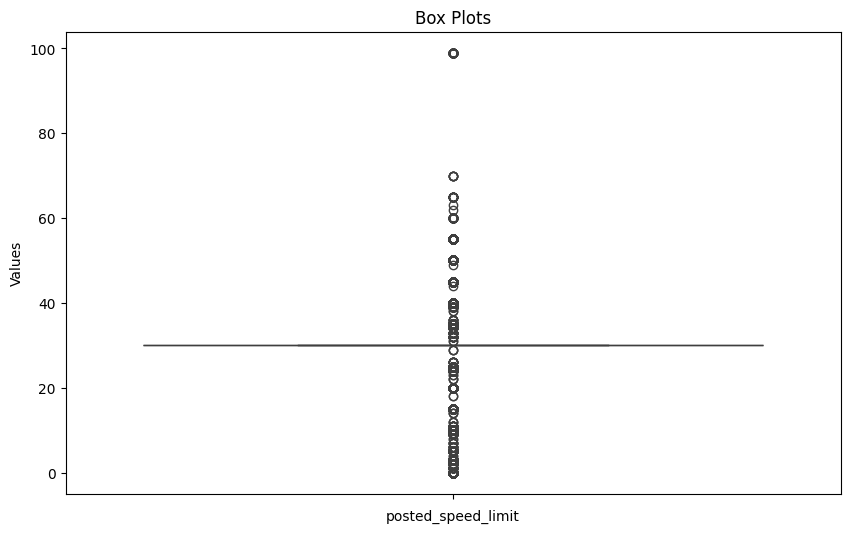

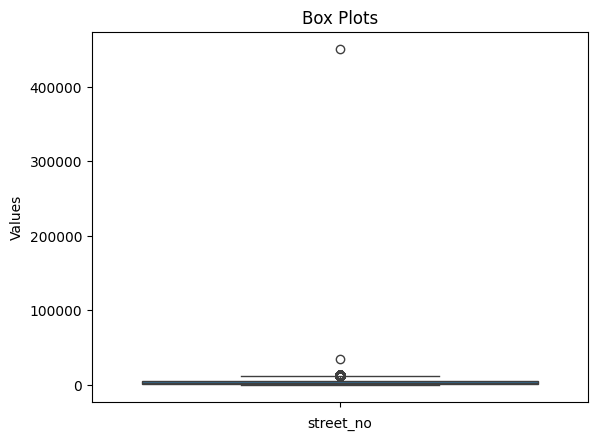

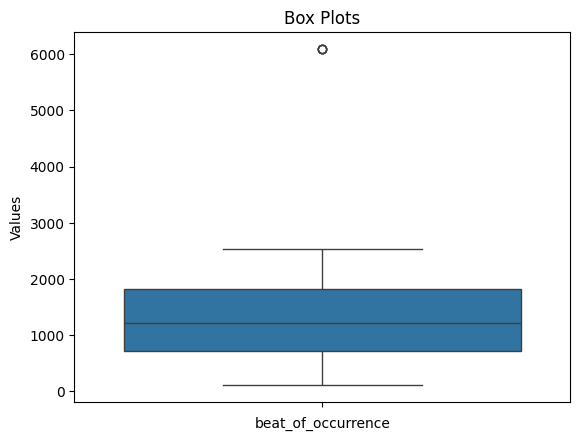

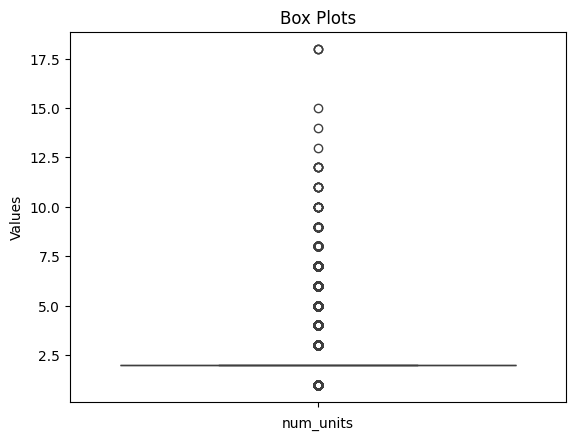

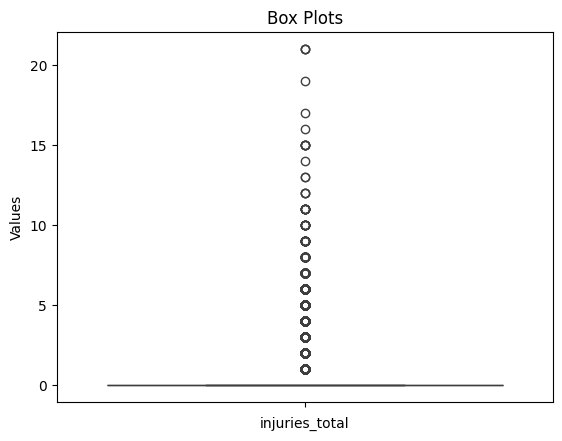

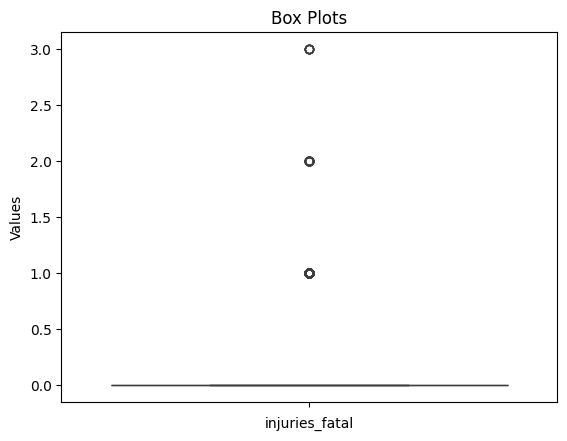

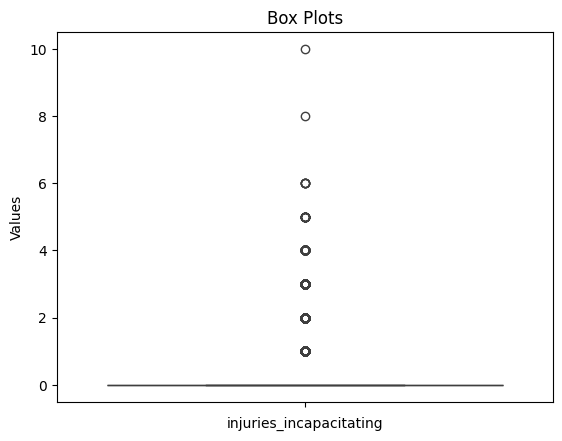

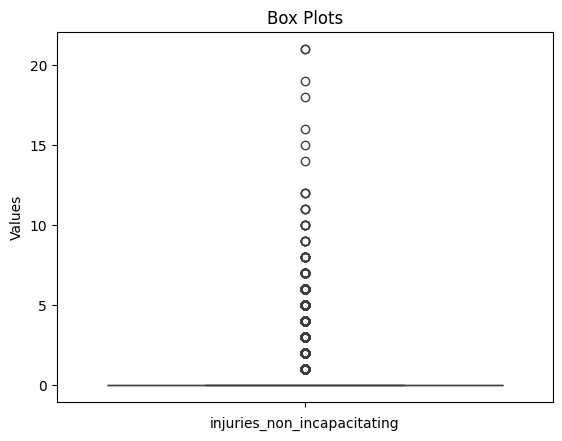

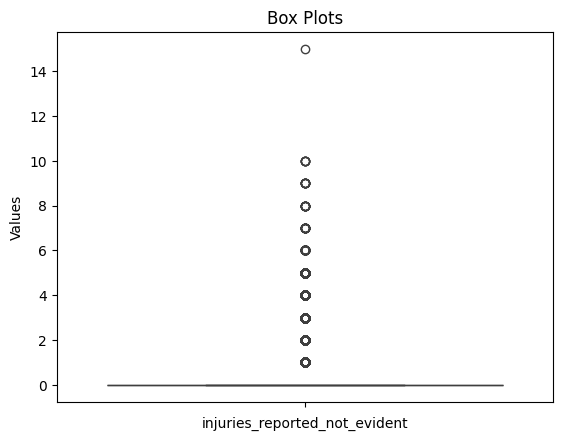

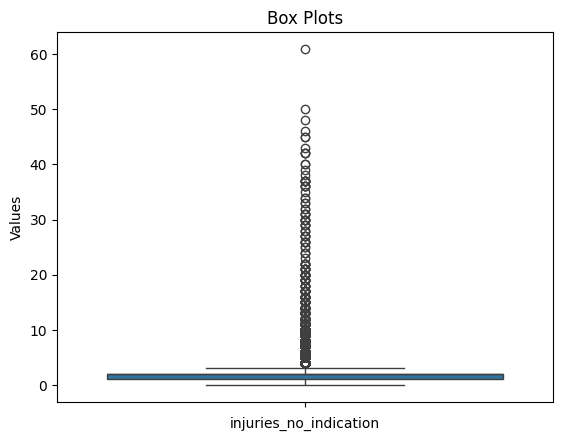

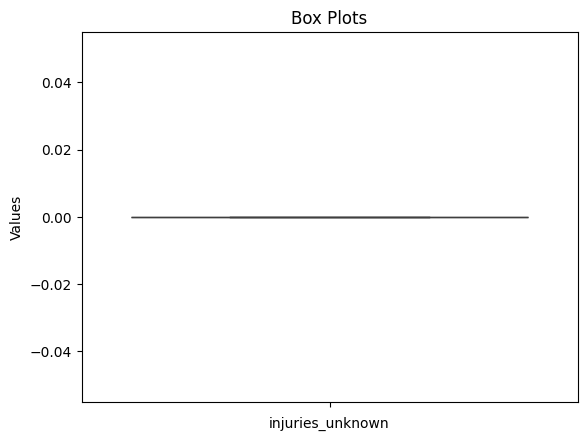

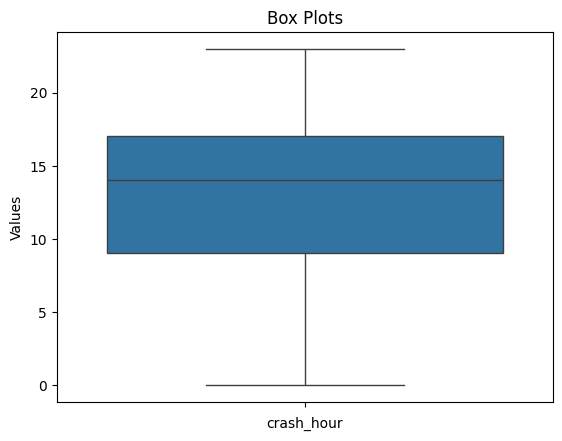

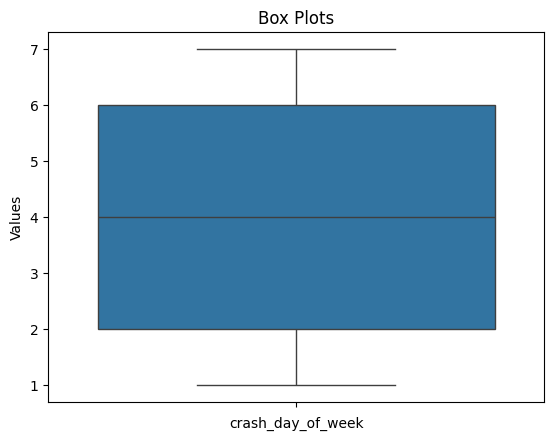

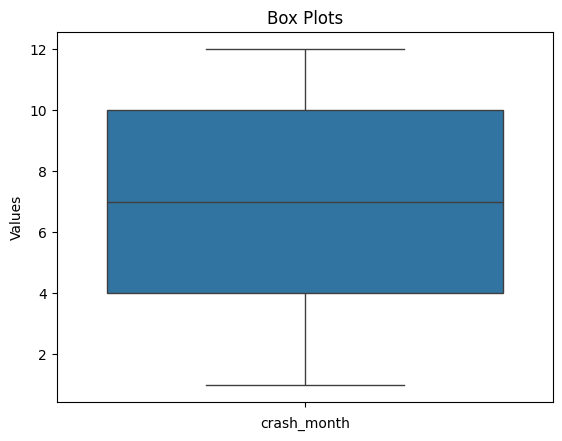

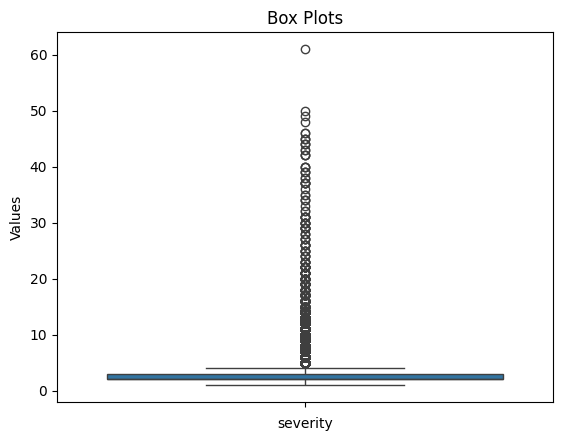

In [95]:
plt.figure(figsize=(10,6))  # Adjust the figure size if needed
for i in nullfree_crashes_df.columns:
    if(nullfree_crashes_df[i].dtype=="object"):
        continue
    sns.boxplot(data=nullfree_crashes_df[i], orient='v')  # Replace with your feature names
    plt.xlabel(i)
    plt.ylabel('Values')
    plt.title('Box Plots')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility if needed
    plt.show()

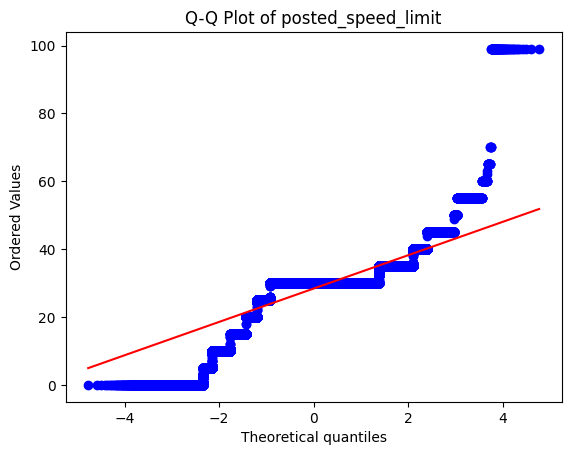

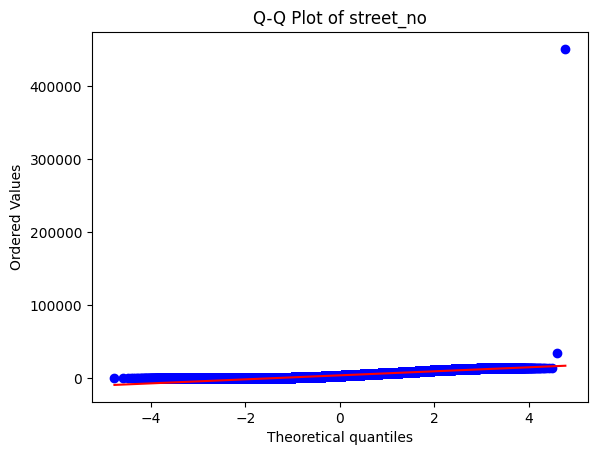

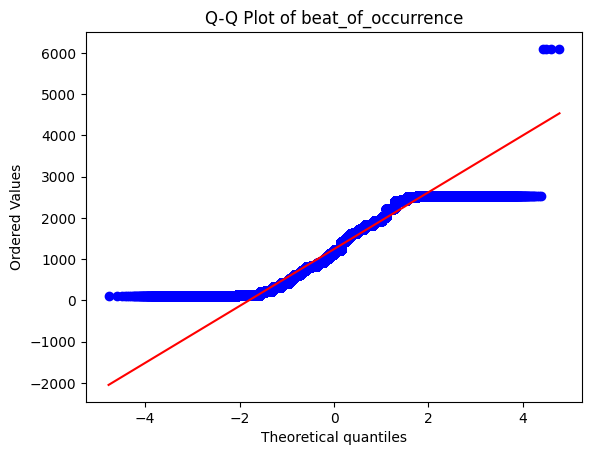

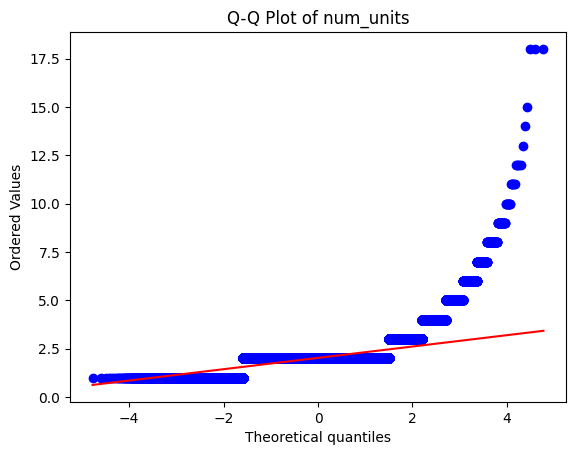

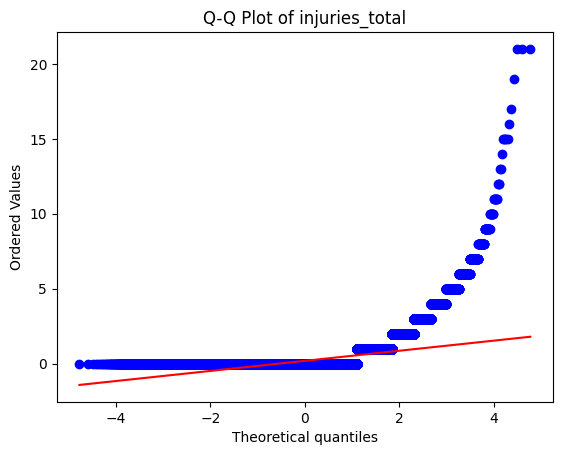

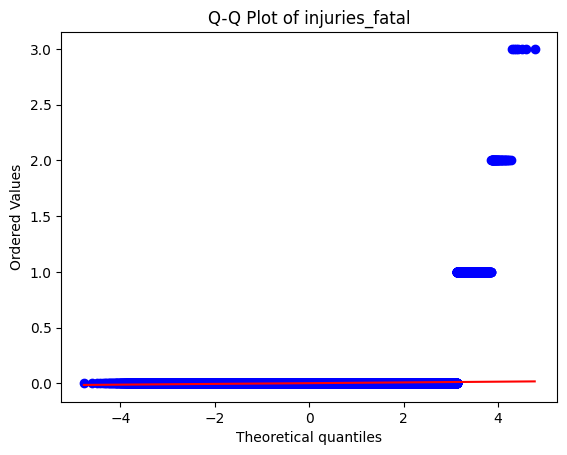

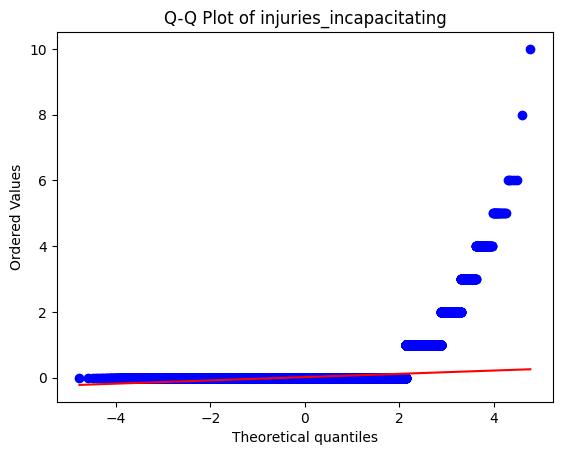

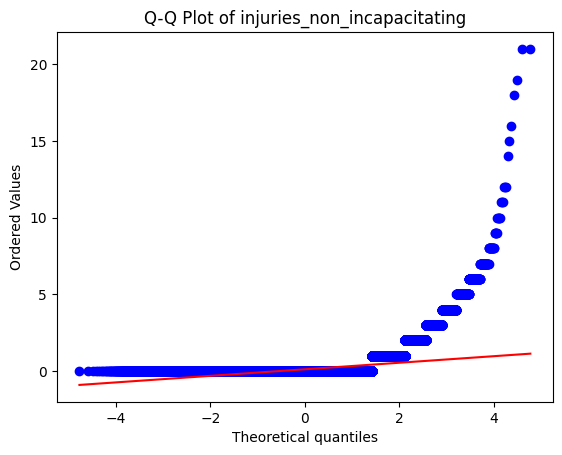

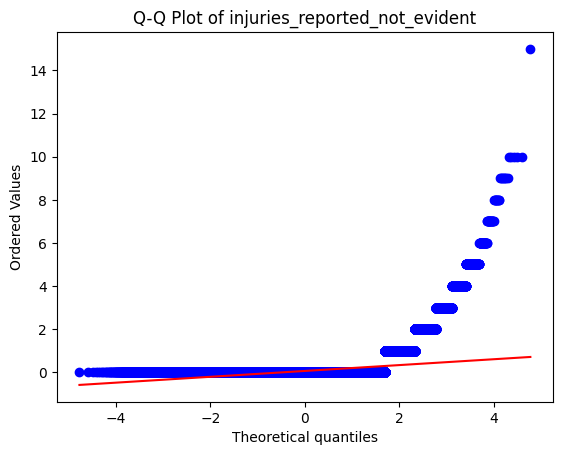

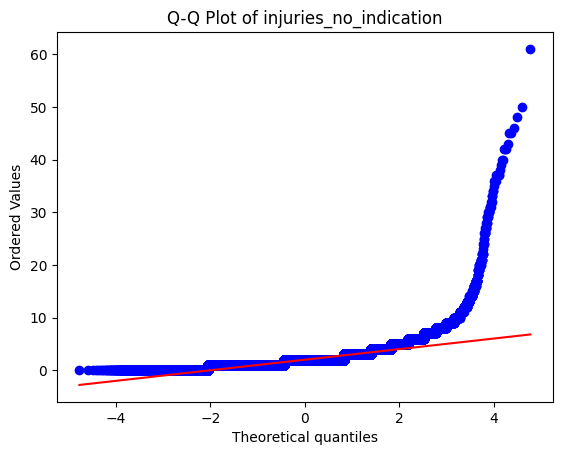

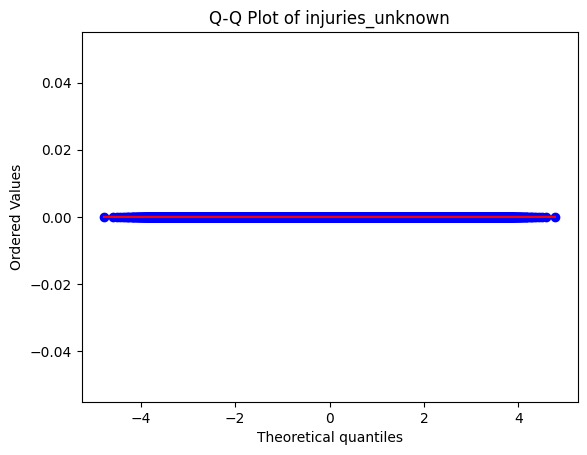

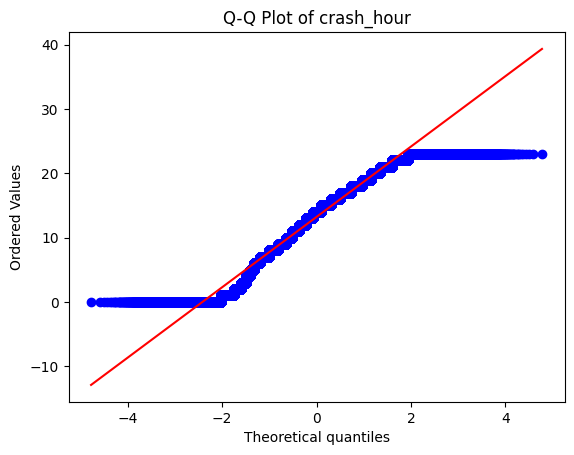

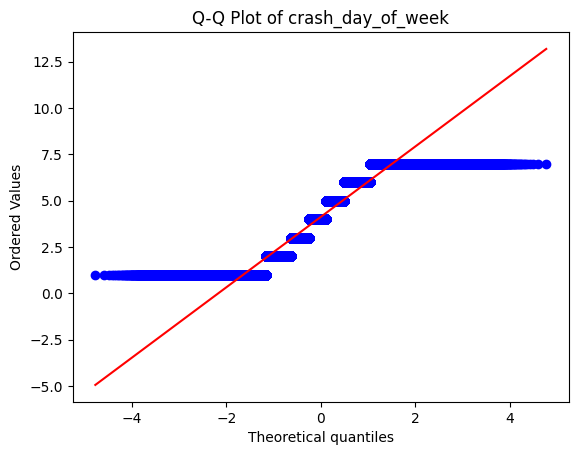

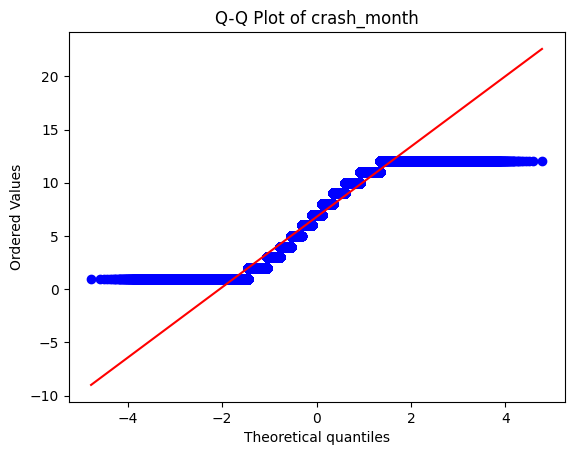

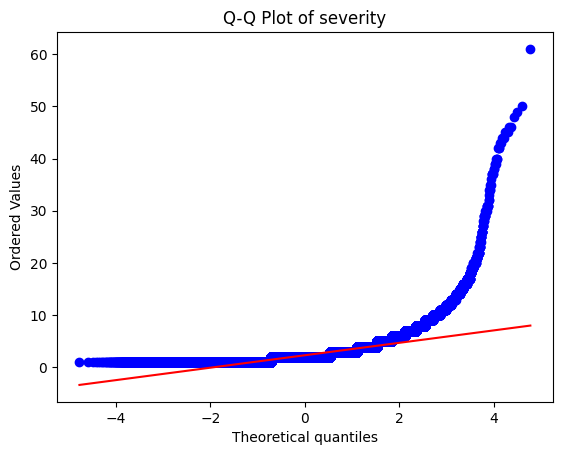

In [96]:
# Generate a Q-Q plot
for i in nullfree_crashes_df.columns:
    if(nullfree_crashes_df[i].dtype=="object"):
        continue

    plt.figure()
    stats.probplot(nullfree_crashes_df[i], dist="norm", plot=plt)
    plt.title('Q-Q Plot of '+i)
    plt.show()

<ipython-input-97-ed8525c18e7b>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




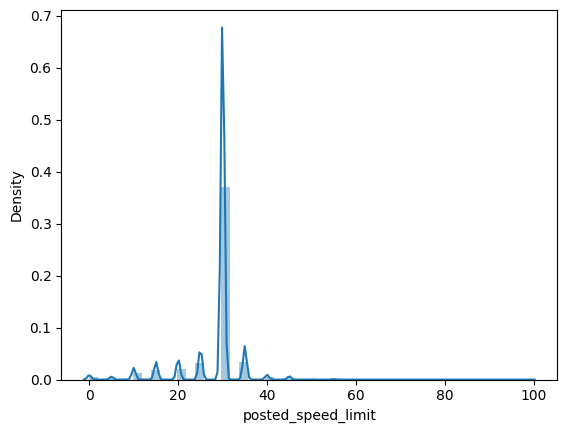

<ipython-input-97-ed8525c18e7b>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




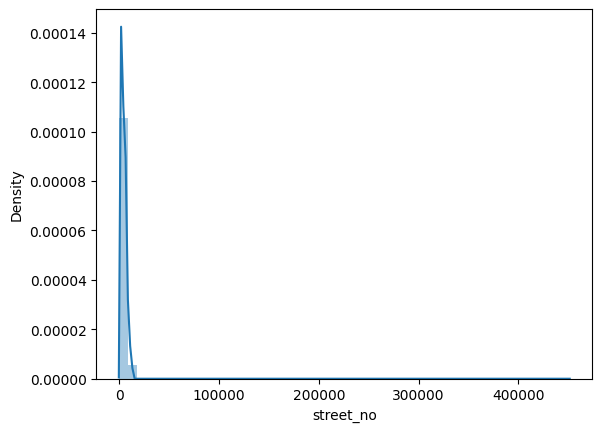

<ipython-input-97-ed8525c18e7b>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




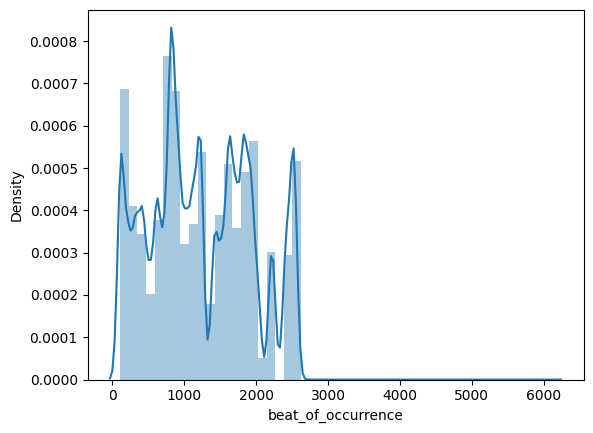

<ipython-input-97-ed8525c18e7b>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




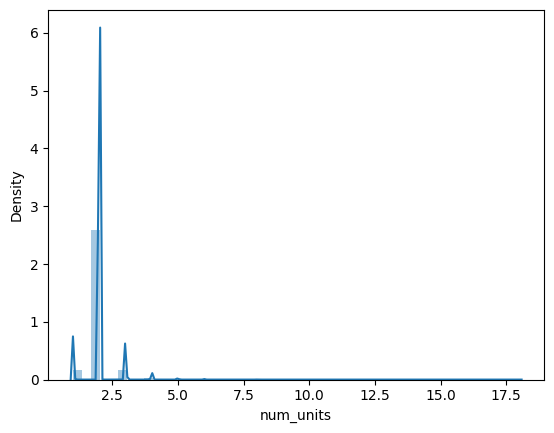

<ipython-input-97-ed8525c18e7b>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




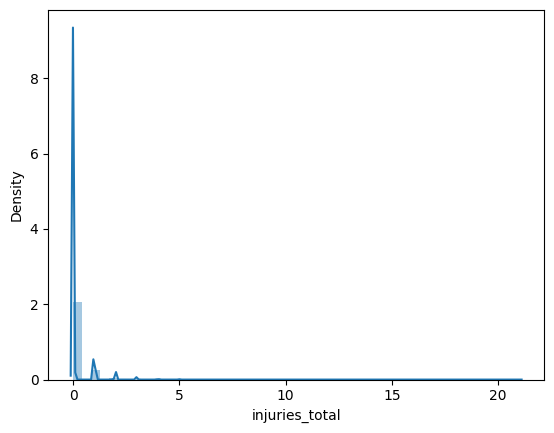

<ipython-input-97-ed8525c18e7b>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




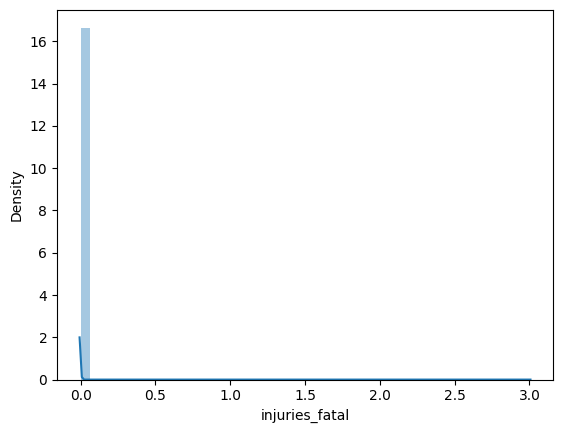

<ipython-input-97-ed8525c18e7b>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




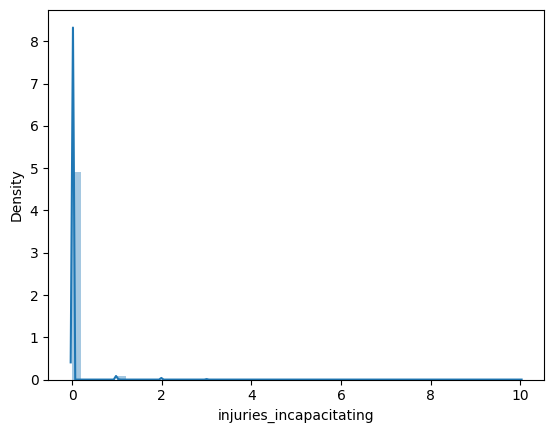

<ipython-input-97-ed8525c18e7b>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




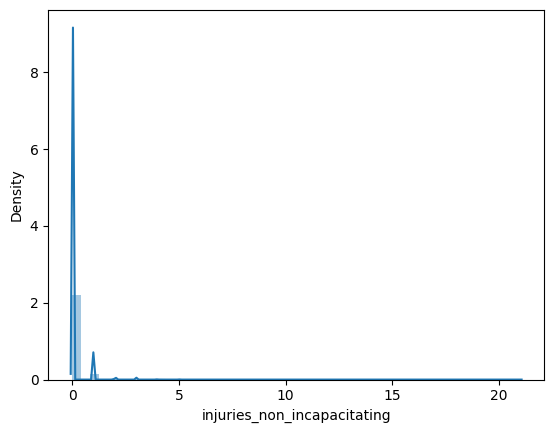

<ipython-input-97-ed8525c18e7b>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




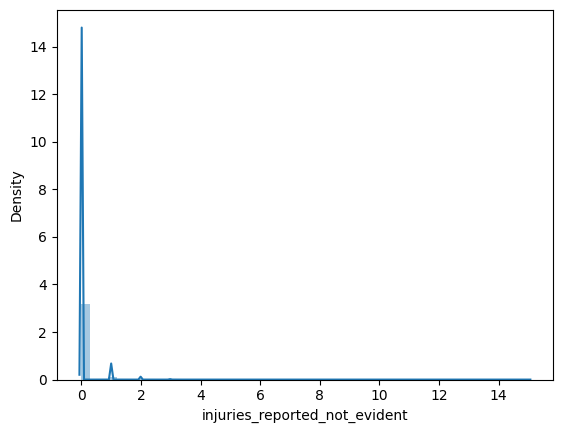

<ipython-input-97-ed8525c18e7b>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




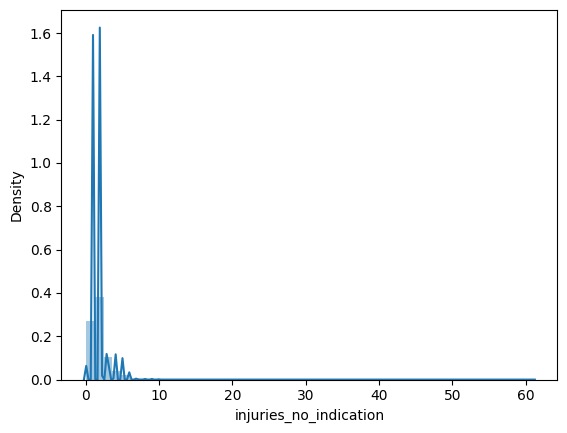

<ipython-input-97-ed8525c18e7b>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



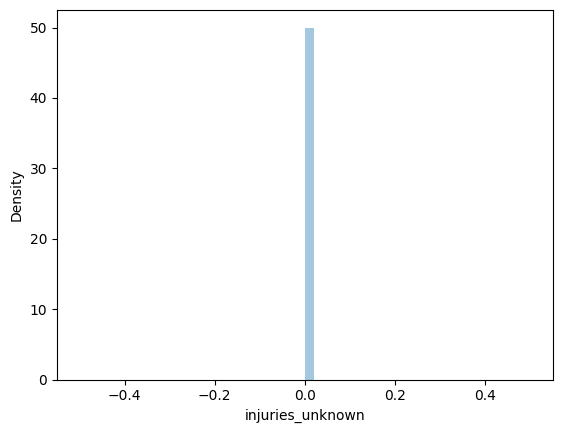

<ipython-input-97-ed8525c18e7b>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




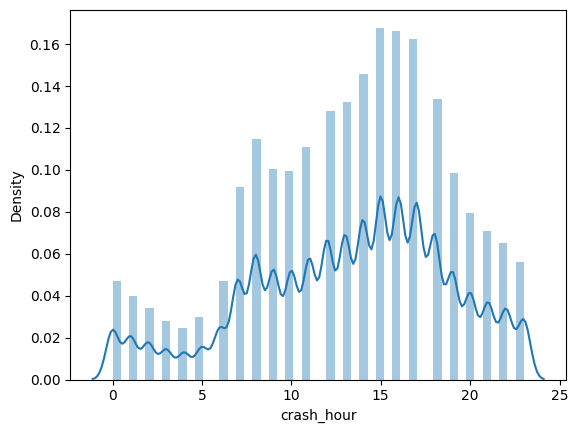

<ipython-input-97-ed8525c18e7b>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




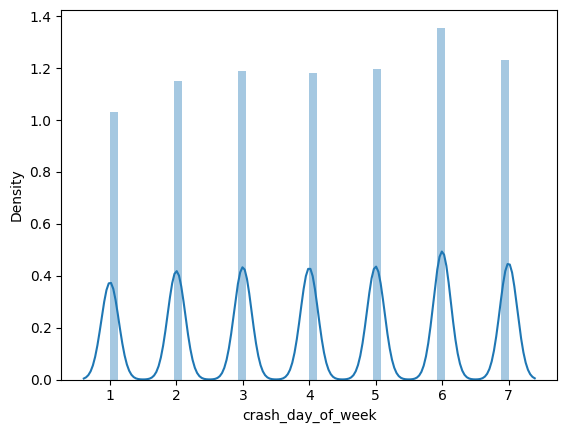

<ipython-input-97-ed8525c18e7b>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




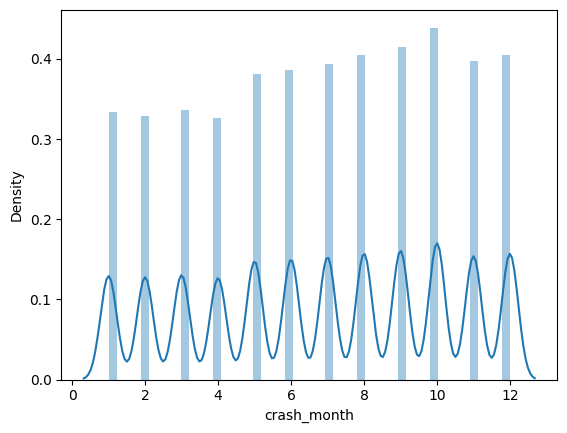

<ipython-input-97-ed8525c18e7b>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




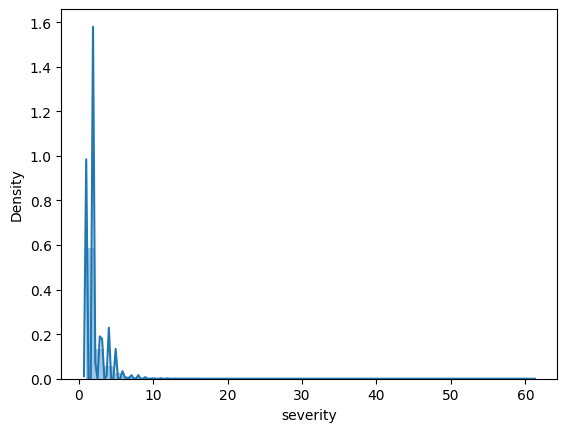

In [97]:
# Generate a Q-Q plot
for i in nullfree_crashes_df.columns:
    if(nullfree_crashes_df[i].dtype=="object"):
        continue

    plt.figure()
    sns.distplot(nullfree_crashes_df[i])
    plt.show()

In [98]:
# Define a threshold for outliers (e.g., 1.5 times IQR)
threshold = 1.5

# Initialize an empty DataFrame to store data without outliers
data_no_outliers = pd.DataFrame()

# Iterate through each column (feature) in the dataset
for column in nullfree_crashes_df.columns:
    if(nullfree_crashes_df[column].dtype=="object" or nullfree_crashes_df[column].dtype=="bool"):
        continue
    # Calculate Q1 and Q3 for the current column
    Q1 = nullfree_crashes_df[column].quantile(0.25)
    Q3 = nullfree_crashes_df[column].quantile(0.75)

    # Calculate IQR for the current column
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    # Filter rows that are not outliers for the current column
    filtered_data = nullfree_crashes_df[(nullfree_crashes_df[column] >= lower_bound) & (nullfree_crashes_df[column] <= upper_bound)]

    # Append the filtered data to the result DataFrame
    data_no_outliers[column] = filtered_data[column]
    # data_no_outliers = pd.concat([data_no_outliers, filtered_data])

# Reset the index of the result DataFrame
data_no_outliers.reset_index(drop=True, inplace=True)
data_no_outliers['posted_speed_limit']
print("maxi1:",max(data_no_outliers['posted_speed_limit']))
print("maxi2:",max(nullfree_crashes_df['posted_speed_limit']))
# data_no_outliers now contains the dataset with outliers removed column-wise

maxi1: 30
maxi2: 99


In [99]:
data_no_outliers

,posted_speed_limit,street_no,beat_of_occurrence,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,severity
0,30,5500.0,225.0,2.0,NaN,0.0,NaN,NaN,0.0,2.0,0.0,19,3,9,NaN
1,30,2101.0,1235.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,14,7,7,1.0
2,30,10020.0,1650.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,23,4,8,2.0
3,30,2.0,1652.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,17,2,2,2.0
4,30,1732.0,1814.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,13,7,7,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566420,30,1110.0,1811.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7,2,11,1.0
566421,30,9500.0,511.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,18,3,10,2.0
566422,30,44.0,512.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,23,7,11,1.0
566423,30,5115.0,813.0,2.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,18,2,11,4.0


In [100]:
print(data_no_outliers.isna().values.any())

True


In [101]:
data_no_outliers.isna().sum()

posted_speed_limit                   0
street_no                         2849
beat_of_occurrence                   3
num_units                        64252
injuries_total                   80532
injuries_fatal                     505
injuries_incapacitating           9694
injuries_non_incapacitating      47151
injuries_reported_not_evident    27666
injuries_no_indication           49117
injuries_unknown                     0
crash_hour                           0
crash_day_of_week                    0
crash_month                          0
severity                         38888
dtype: int64

In [102]:
clean_df = data_no_outliers.dropna()

<Figure size 640x480 with 0 Axes>

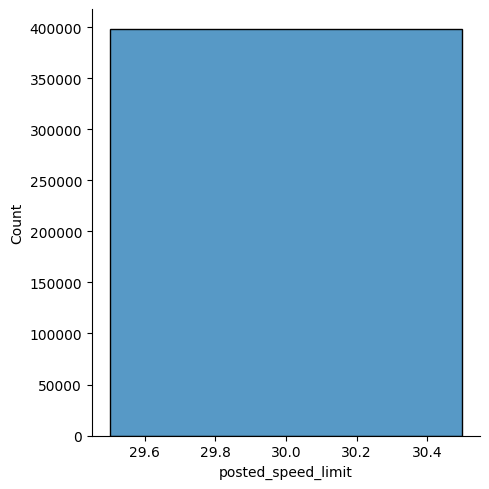

<Figure size 640x480 with 0 Axes>

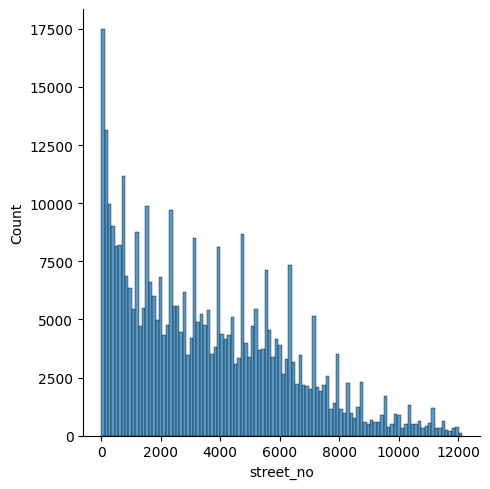

<Figure size 640x480 with 0 Axes>

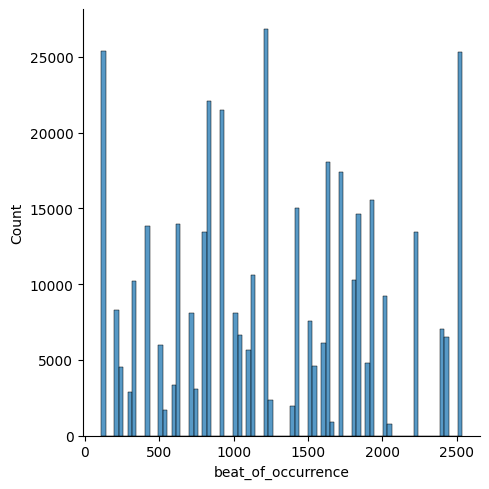

<Figure size 640x480 with 0 Axes>

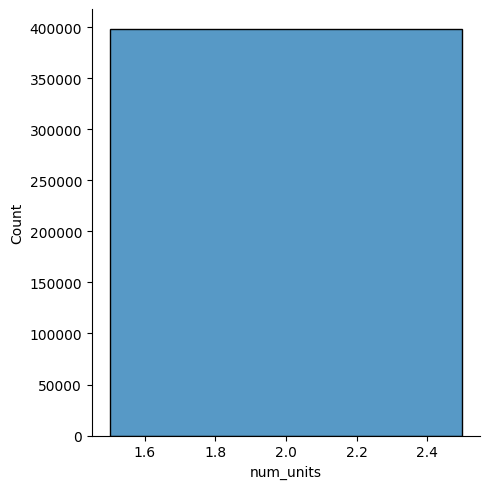

<Figure size 640x480 with 0 Axes>

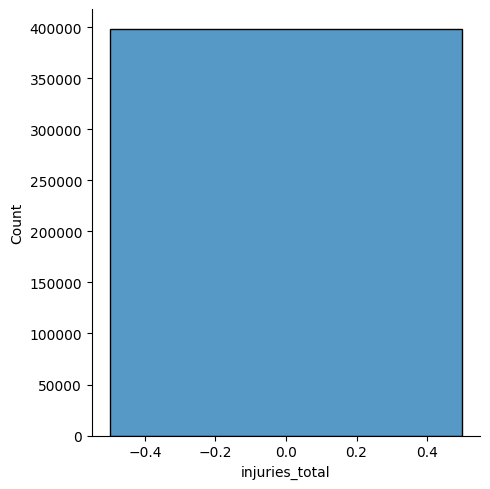

<Figure size 640x480 with 0 Axes>

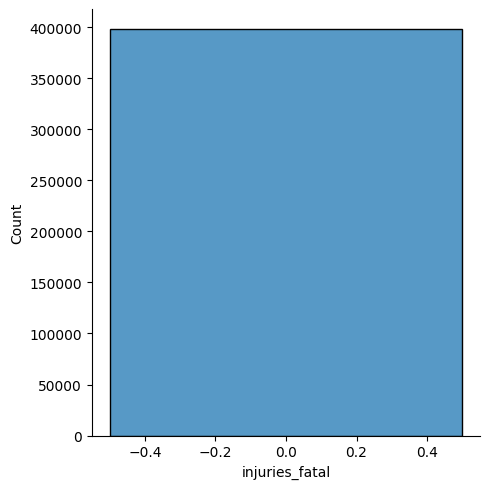

<Figure size 640x480 with 0 Axes>

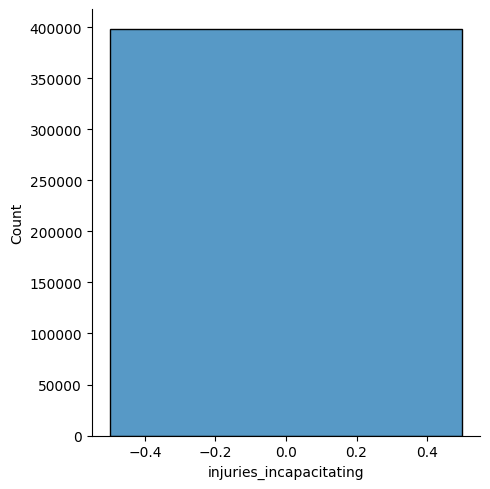

<Figure size 640x480 with 0 Axes>

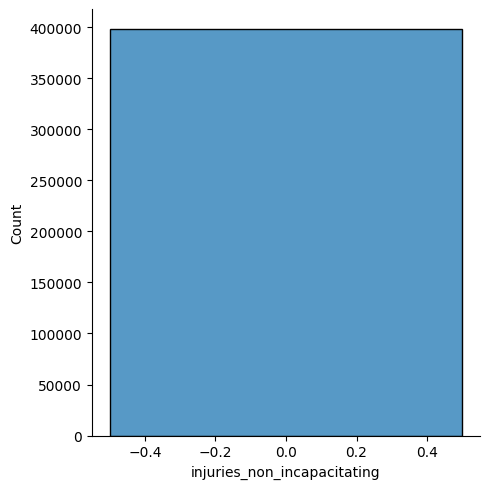

<Figure size 640x480 with 0 Axes>

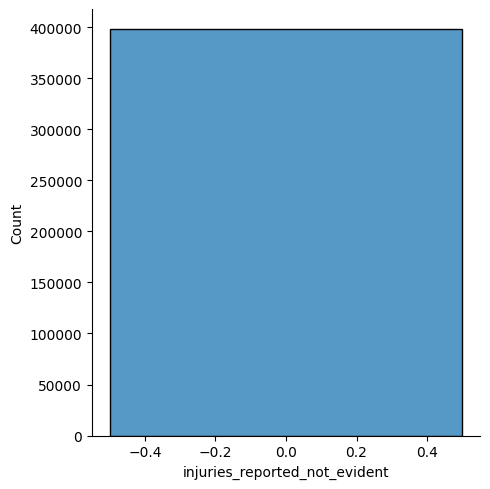

<Figure size 640x480 with 0 Axes>

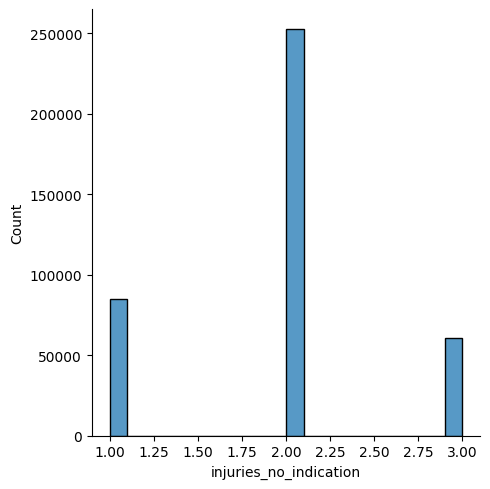

<Figure size 640x480 with 0 Axes>

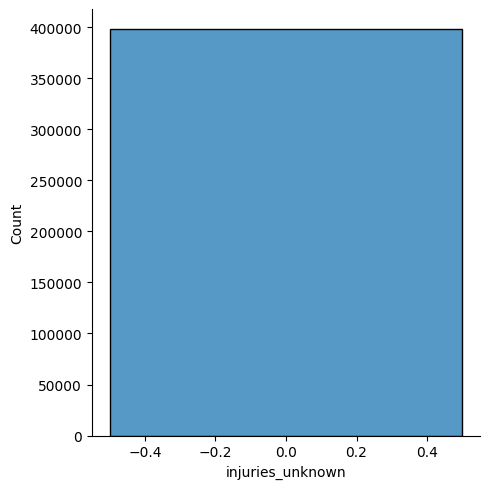

<Figure size 640x480 with 0 Axes>

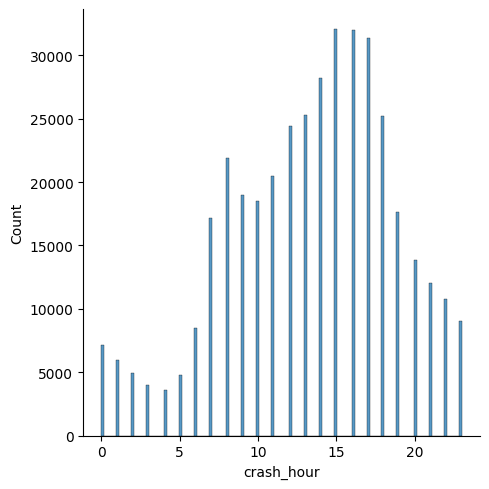

<Figure size 640x480 with 0 Axes>

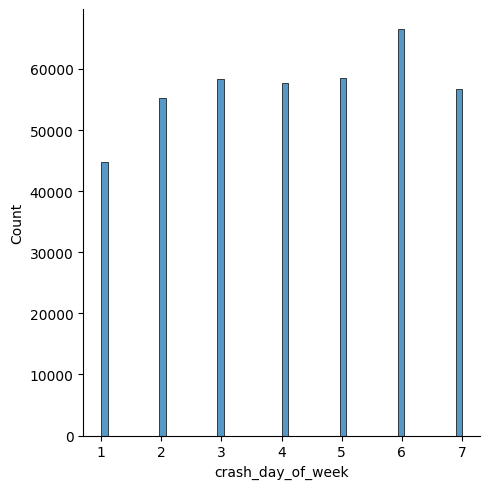

<Figure size 640x480 with 0 Axes>

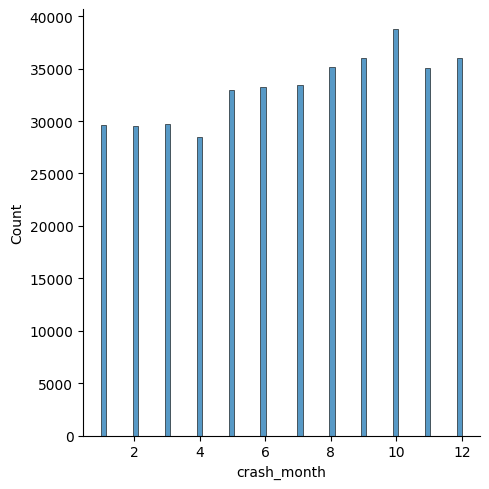

<Figure size 640x480 with 0 Axes>

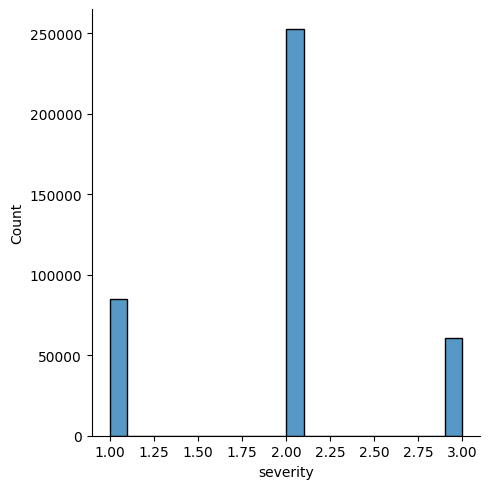

In [103]:
# Plot after removing outliers
for i in clean_df.columns:
    if(clean_df[i].dtype=="object"):
        continue

    plt.figure()
    sns.displot(clean_df[i])
    plt.show()

In [104]:
clean_df

,posted_speed_limit,street_no,beat_of_occurrence,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,severity
2,30,10020.0,1650.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,23,4,8,2.0
3,30,2.0,1652.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,17,2,2,2.0
4,30,1732.0,1814.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,13,7,7,3.0
5,30,5900.0,232.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0,1,8,2.0
6,30,10000.0,1650.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,6,6,9,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566417,30,4200.0,1115.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,21,4,11,2.0
566418,30,113.0,1224.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,22,2,11,1.0
566420,30,1110.0,1811.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7,2,11,1.0
566421,30,9500.0,511.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,18,3,10,2.0


In [105]:
nullfree_crashes_df = nullfree_crashes_df.drop([
    'crash_record_id','crash_date','date_police_notified','traffic_control_device','report_type','most_severe_injury','street_no','street_direction','street_name','beat_of_occurrence','num_units','injuries_fatal','injuries_incapacitating','injuries_non_incapacitating','injuries_reported_not_evident','injuries_no_indication','injuries_unknown'
], axis=1)

In [106]:
nullfree_crashes_df

,posted_speed_limit,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,damage,prim_contributory_cause,sec_contributory_cause,injuries_total,crash_hour,crash_day_of_week,crash_month,severity
0,30,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,3.0,19,3,9,9.0
1,50,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",FOLLOWING TOO CLOSELY,FOLLOWING TOO CLOSELY,0.0,18,6,9,2.0
2,30,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",FAILING TO REDUCE SPEED TO AVOID CRASH,"OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...",0.0,14,7,7,1.0
3,30,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",FAILING TO YIELD RIGHT-OF-WAY,NOT APPLICABLE,0.0,23,4,8,2.0
4,15,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",FOLLOWING TOO CLOSELY,DISTRACTION - FROM INSIDE VEHICLE,1.0,12,6,8,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794951,30,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",IMPROPER BACKING,UNABLE TO DETERMINE,0.0,7,2,11,1.0
794952,30,NO CONTROLS,UNKNOWN,UNKNOWN,SIDESWIPE SAME DIRECTION,OTHER,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,"$501 - $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,0.0,18,3,10,2.0
794953,30,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",IMPROPER BACKING,IMPROPER BACKING,0.0,23,7,11,1.0
794954,30,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,0.0,18,2,11,4.0


In [107]:
nullfree_crashes_df.to_csv("model_df.csv")